In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow import keras
import numpy as np

In [2]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()


print("train_images shape : ", train_images.shape)
print("train_labels shape : ", train_labels.shape)
print("test_images shape : ", test_images.shape)
print("test_labels shape : ", test_labels.shape)

11493376/11490434 [==============================] - 0s 0us/step
train_images shape :  (60000, 28, 28)
train_labels shape :  (60000,)
test_images shape :  (10000, 28, 28)
test_labels shape :  (10000,)


Displaying train index =  6388
train label [6388] = 6 
------------ raw data for train_image[6388] -------
--------------------


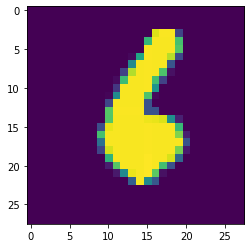

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import random

index = random.randint(0, len(train_images))
# index = 10
print ("Displaying train index = ", index)

print("train label [{}] = {} ".format(index, train_labels[index]))
print ("------------ raw data for train_image[{}] -------".format(index))
#print(train_images[index])
print ("--------------------")

plt.imshow(train_images[index])
plt.show()

In [4]:
### Scale the vectors to 0-1 from 0-255 range
train_images  = train_images / 255.0
test_images = test_images / 255.0

In [5]:
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical

In [6]:
## One Hot Encoding
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)


In [7]:
model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape = (28, 28, 1)),
        tf.keras.layers.Dense(128, activation = 'relu'),
        tf.keras.layers.Dense(64, activation = 'relu'),
        tf.keras.layers.Dense(10, activation = 'softmax')
])

In [8]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
print (model.summary())
#tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________
None


In [20]:

epochs= 30
print ("training starting ...")

history = model.fit(
    train_images,
    train_labels,
    epochs=epochs,
    validation_split=0.2,
    verbose=1,
   #callbacks=[early_stopping_monitor]
)

print ("training done.")

training starting ...
Epoch 1/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0039 - accuracy: 0.9994 - val_loss: 0.5204 - val_accuracy: 0.9786
Epoch 2/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0038 - accuracy: 0.9995 - val_loss: 0.5568 - val_accuracy: 0.9782
Epoch 3/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0059 - accuracy: 0.9991 - val_loss: 0.5491 - val_accuracy: 0.9789
Epoch 4/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0024 - accuracy: 0.9995 - val_loss: 0.5598 - val_accuracy: 0.9801
Epoch 5/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0020 - accuracy: 0.9996 - val_loss: 0.5535 - val_accuracy: 0.9802
Epoch 6/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0028 - accuracy: 0.9996 - val_loss: 0.5348 - val_accuracy: 0.9803
Epoch 7/30
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0021 - accuracy: 0.9997 - val_loss: 

In [21]:
scores = model.evaluate(test_images, test_labels, verbose=0)

In [22]:
print(scores)

[0.46729663014411926, 0.9821000099182129]


In [23]:
predicted = model.predict_classes(test_images, batch_size = 32, verbose = 1)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
313/313 [==============================] - 0s 909us/step


In [24]:
test_labels[1]

2

In [25]:
predicted[1]

2

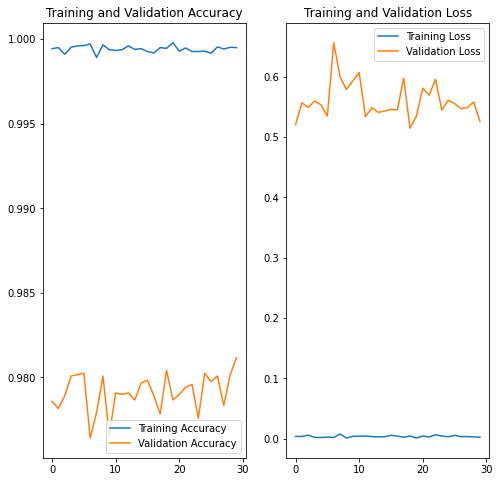

In [26]:
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

training_loss = history.history['loss']
validation_loss = history.history['val_loss']

epochs_range=range(len(training_accuracy))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, training_accuracy, label='Training Accuracy')
plt.plot(epochs_range, validation_accuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, training_loss, label='Training Loss')
plt.plot(epochs_range, validation_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [27]:
import numpy as np
predictions = model.predict(test_images)

predictions2 = [ np.argmax(p) for p in predictions]

In [28]:
from sklearn.metrics import classification_report
from pprint import pprint

pprint(classification_report(test_labels, predictions2, output_dict=True))

{'0': {'f1-score': 0.9892911779704233,
       'precision': 0.9887869520897044,
       'recall': 0.9897959183673469,
       'support': 980},
 '1': {'f1-score': 0.9925011027790032,
       'precision': 0.9938162544169611,
       'recall': 0.9911894273127754,
       'support': 1135},
 '2': {'f1-score': 0.9806576402321083,
       'precision': 0.9787644787644788,
       'recall': 0.9825581395348837,
       'support': 1032},
 '3': {'f1-score': 0.9748644652538196,
       'precision': 0.9705593719332679,
       'recall': 0.9792079207920792,
       'support': 1010},
 '4': {'f1-score': 0.98419173890872,
       'precision': 0.9856996935648621,
       'recall': 0.9826883910386965,
       'support': 982},
 '5': {'f1-score': 0.9776035834266517,
       'precision': 0.9765100671140939,
       'recall': 0.9786995515695067,
       'support': 892},
 '6': {'f1-score': 0.9884937238493724,
       'precision': 0.9905660377358491,
       'recall': 0.9864300626304802,
       'support': 958},
 '7': {'f1-score': 